# **Práctica 1: Análisis exploratorio de datos**

Nombre:
* Oswaldo Cabrera Pérez
* David Hernández Rivera

No. Cuenta:
* 316110451
* 316161855

Email:
* oswaldo121oswaldo@gmail.com
* david316fi@gmail.com

### **Contexto**

El sector inmobiliario de Melbourne, Australia continúa en auge desde hace algunos años. 
Es de interés conocer la tendencia inmobiliaria en dicha ciudad debido a que cada vez es más difícil adquirir una unidad de 2 dormitorios a un precio razonable.

**Objetivo:** Encontrar información de interés para predecir la próxima tendencia inmobiliaria en Melbourne.


**Fuente de datos**

* 1) Rooms: Número de habitaciones.
* 2) Price: Precio en dolares.
* 3) Method: S - propiedad vendida; SP - propiedad vendida antes; PI - propiedad transferida; PN - vendida antes no revelada; SN - vendida no revelada; NB - sin oferta; VB - oferta del proveedor; W - retirada antes de la subasta; SA - vendida después de subasta; SS - vendida después del precio de subasta no revelado. N/A - precio u oferta más alta no disponible.
* 4) Type: br - dormitorio (s); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; dev site – en desarrollo; o res - otro residencial.
* 5) SellerG: Agente de bienes raíces.
* 6) Date: Fecha de venta.
* 7) Distance: Distancia del CBD (Centro de negocios).
* 8) Regionname: Región general (oeste, noroeste, norte, noreste ...).
* 9) Propertycount: Número de propiedades que existen en el suburbio.
* 10) Bedroom2: Número de dormitorios (de otra fuente).
* 11) Bathroom: Cantidad de baños.
* 12) Car: Número de estacionamientos.
* 13) Landsize: Tamaño del terreno.
* 14) BuildingArea: Tamaño del edificio.
* 15) CouncilArea: Consejo de gobierno de la zona (Municipio).


### **Importar las bibliotecas y los datos**

In [32]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline
import plotly.express as px   
# Para generar y almacenar los gráficos dentro del cuaderno

In [6]:
DatosMiami = pd.read_csv("https://raw.githubusercontent.com/OswaCabrera/DataMining/main/Data/miami-housing.csv")
DatosMiami

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,25.783130,-80.259795,131320040990,275000.0,6780,967,6580,3844.5,20568.0,3252.4,22175.9,12150.1,917.4,16,0,4,4
13928,25.783585,-80.260354,131320040910,340000.0,7500,1854,2544,3593.6,20791.9,3077.7,22375.1,12316.8,738.2,26,0,5,4
13929,25.783793,-80.256126,131320040420,287500.0,8460,1271,2064,4143.2,20307.9,3588.4,20966.9,12433.0,743.7,16,0,7,4
13930,25.784007,-80.257542,131320040330,315000.0,7500,1613,3136,3986.9,20542.6,3589.1,21475.6,12458.0,626.1,16,0,8,4


Tipo:



In [8]:
DatosMiami.head(10)

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,622280070620,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,622280100460,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,622280100470,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,622280100530,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,622280100200,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4
5,25.892060,-80.161354,622280070180,630000.0,9900,1531,2978,2391.4,13017.0,188.9,43135.1,38176.2,15687.2,41,0,2,4
6,25.892473,-80.157217,622280080100,1020000.0,10387,1753,23116,3277.4,11667.8,0.0,43598.7,37973.9,17068.2,63,0,2,5
7,25.893019,-80.157426,622280080400,850000.0,10272,1663,34933,3112.4,11718.1,10.5,43780.8,38198.3,16989.9,21,0,9,4
8,25.893046,-80.161556,622280080020,250000.0,9375,1493,11668,2081.8,13043.8,51.5,43481.7,38542.0,15623.3,56,0,3,4
9,25.893050,-80.158048,622280080370,1220000.0,13803,3077,34580,2937.7,11917.7,9.7,43730.1,38235.2,16787.0,63,0,11,5


Método:

S - propiedad vendida; 
SP - propiedad vendida antes; 
PI - propiedad transferida; 
PN - vendido antes no revelado; 
SN - vendido no revelado; 
NB - sin oferta; 
VB - oferta del proveedor; 
W - retirado antes de la subasta; 
SA - vendido después de subasta; 
SS - vendido después del precio de subasta no revelado. 
N/A - precio o oferta más alta no disponible.

### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [9]:
DatosMiami.shape

(13932, 17)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [10]:
DatosMiami.dtypes #

LATITUDE             float64
LONGITUDE            float64
PARCELNO               int64
SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
dtype: object

Se observa que el conjunto de datos tiene una combinación de variables categóricas (objeto) y numéricas (flotante e int).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [11]:
DatosMiami.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [12]:
DatosMiami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13932 entries, 0 to 13931
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LATITUDE           13932 non-null  float64
 1   LONGITUDE          13932 non-null  float64
 2   PARCELNO           13932 non-null  int64  
 3   SALE_PRC           13932 non-null  float64
 4   LND_SQFOOT         13932 non-null  int64  
 5   TOT_LVG_AREA       13932 non-null  int64  
 6   SPEC_FEAT_VAL      13932 non-null  int64  
 7   RAIL_DIST          13932 non-null  float64
 8   OCEAN_DIST         13932 non-null  float64
 9   WATER_DIST         13932 non-null  float64
 10  CNTR_DIST          13932 non-null  float64
 11  SUBCNTR_DI         13932 non-null  float64
 12  HWY_DIST           13932 non-null  float64
 13  age                13932 non-null  int64  
 14  avno60plus         13932 non-null  int64  
 15  month_sold         13932 non-null  int64  
 16  structure_quality  139

### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

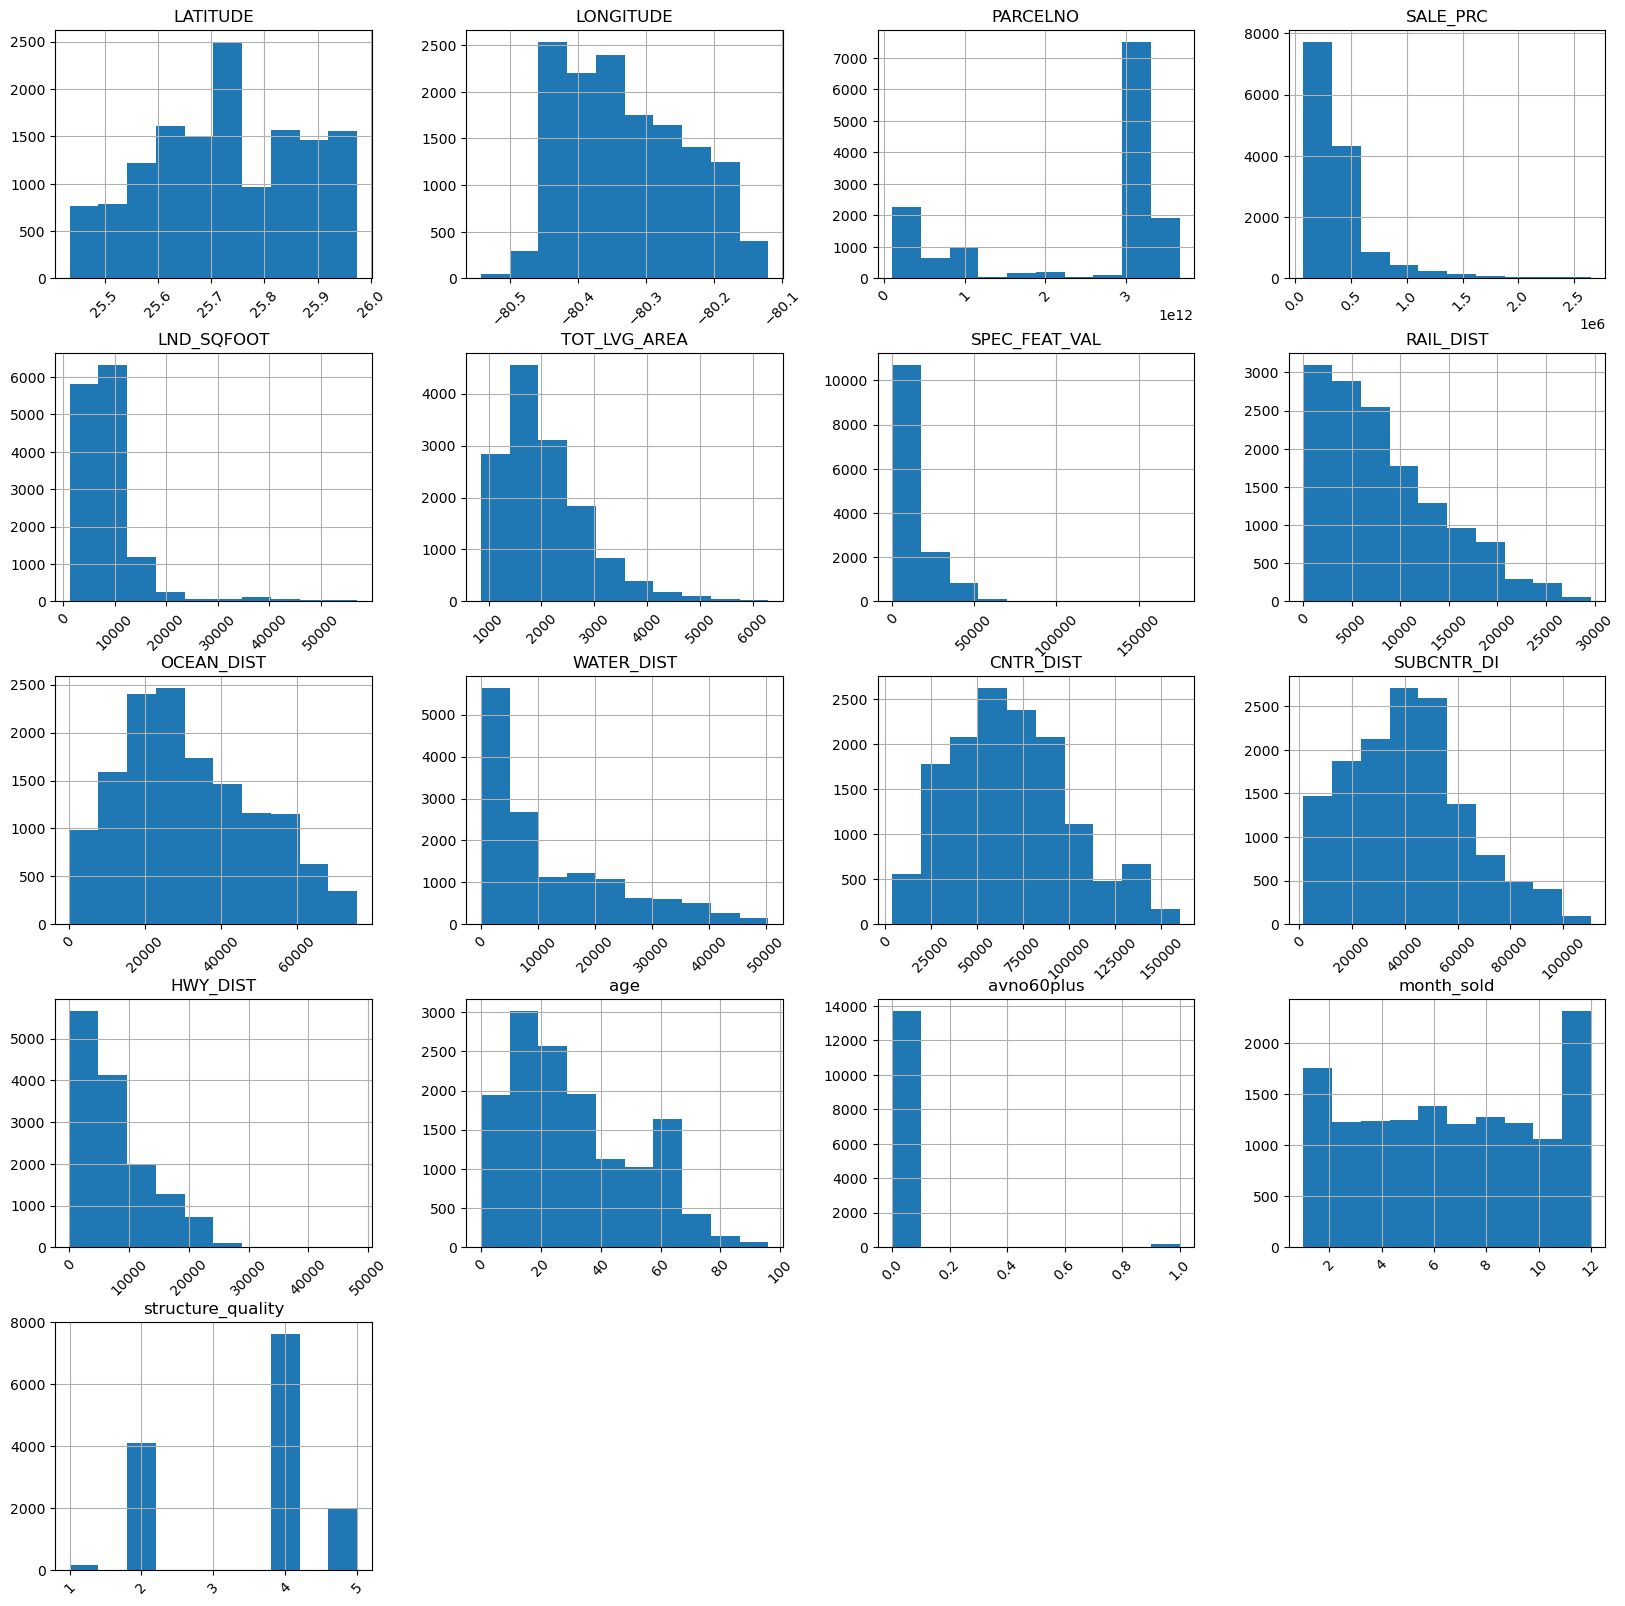

('SALE_PRC', 'SPEC_FEAT_VAL', 'LND_SQFOOT')

In [14]:
DatosMiami.hist(figsize=(20,20), xrot=45)
plt.show()
'SALE_PRC', 'SPEC_FEAT_VAL', 'LND_SQFOOT'

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma, se observa que **BuildingArea** y **LandSize** tienen valores sesgados a la izquierda. La variable **Price** también está sesgada hacia la izquierda. **YearBuilt** está sesgado hacia la derecha y el límite comienza en 1200, lo cual es extraño.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [15]:
DatosMiami.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020008e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores perdidos. Estos son: **Car**, **Landsize** y **YearBuilt**.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

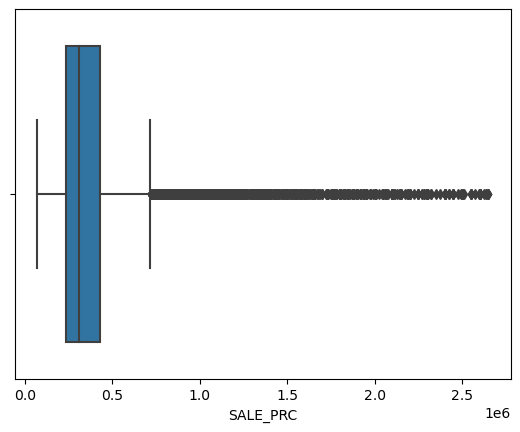

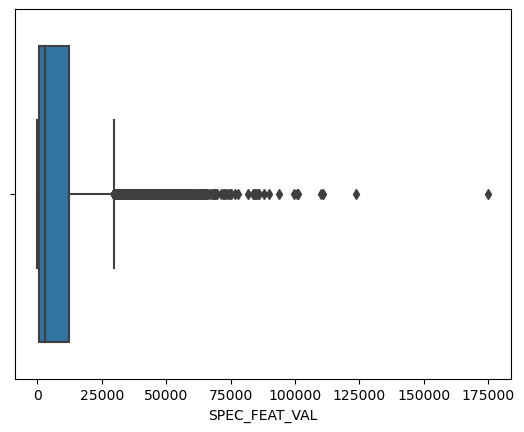

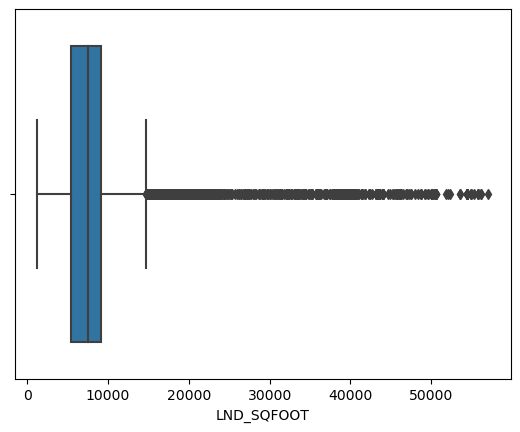

In [16]:
VariablesValoresAtipicos = ['SALE_PRC', 'SPEC_FEAT_VAL', 'LND_SQFOOT']
for col in VariablesValoresAtipicos:
  sns.boxplot(x=col, data=DatosMiami)
  plt.show()

Se observa que Landsize, Buildingarea y YearBuilt tienen valores atípicos que están lejos de los otros valores.

**4) Distribución de variables categóricas**

Se refiere a la observación de las clases de cada columna (variable) y su frecuencia. Aquí, los gráficos ayudan para tener una idea general de las distribuciones, mientras que las estadísticas dan números reales.

In [ ]:
# DatosMelbourne.describe(include='object')

* Esta tabla es diferente al de los valores numéricos. Aquí, se obtiene el recuento de los valores de cada variable, el número de clases únicas, la clase más frecuente y con qué frecuencia ocurre esa clase en el conjunto de datos.
* Se observa que algunas clases tienen demasiados valores únicos, como Address, seguida de Suburb y SellerG. 
* A partir de estos hallazgos, se puede a manera de ejemplo graficar las variables con 10 o menos clases únicas.

**Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


In [ ]:
# for col in DatosMelbourne.select_dtypes(include='object'):
#   if DatosMelbourne[col].nunique()<10:sns.countplot(y=col, data=DatosMelbourne)
#   plt.show()

**5) Agrupación por variables categóricas**





In [ ]:
# for col in DatosMelbourne.select_dtypes(include='object'):
#   if DatosMelbourne[col].nunique() < 10:
#     display(DatosMelbourne.groupby(col).agg(['mean']))

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [17]:
DatosMiami.corr()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
LATITUDE,1.000000,0.721232,-0.165487,0.047701,-0.077481,-0.193972,-0.007634,-0.172382,0.242735,-0.423396,-0.717348,-0.195823,-0.113443,0.416967,0.081366,-0.023634,0.391989
LONGITUDE,0.721232,1.000000,-0.432816,0.195274,0.018242,-0.181007,-0.009372,-0.303155,-0.457477,-0.764256,-0.791968,-0.380220,-0.216406,0.488757,0.059416,-0.010859,0.132893
PARCELNO,-0.165487,-0.432816,1.000000,-0.204068,0.071381,0.102439,0.055152,0.223387,0.289232,0.295951,0.419933,0.243888,0.018247,-0.270718,-0.160925,0.011129,0.044652
SALE_PRC,0.047701,0.195274,-0.204068,1.000000,0.363077,0.667301,0.497500,-0.077009,-0.274675,-0.127938,-0.271425,-0.370078,0.231877,-0.123408,-0.027026,0.000325,0.383995
LND_SQFOOT,-0.077481,0.018242,0.071381,0.363077,1.000000,0.437472,0.390707,-0.083901,-0.161579,-0.055093,-0.023181,-0.159094,0.130488,0.101244,-0.005899,0.005926,-0.006686
TOT_LVG_AREA,-0.193972,-0.181007,0.102439,0.667301,0.437472,1.000000,0.506064,0.075486,-0.050141,0.148343,0.136526,-0.044882,0.229497,-0.340606,-0.056545,0.002517,0.173422
SPEC_FEAT_VAL,-0.007634,-0.009372,0.055152,0.497500,0.390707,0.506064,1.000000,-0.021965,-0.055155,0.013923,-0.048817,-0.151916,0.153770,-0.098780,-0.008879,-0.014012,0.188030
RAIL_DIST,-0.172382,-0.303155,0.223387,-0.077009,-0.083901,0.075486,-0.021965,1.000000,0.258966,0.162313,0.444494,0.485468,-0.092495,-0.234515,-0.116955,0.010560,-0.074075
OCEAN_DIST,0.242735,-0.457477,0.289232,-0.274675,-0.161579,-0.050141,-0.055155,0.258966,1.000000,0.490764,0.245396,0.425869,0.093500,-0.159409,0.035215,-0.012723,0.209497
WATER_DIST,-0.423396,-0.764256,0.295951,-0.127938,-0.055093,0.148343,0.013923,0.162313,0.490764,1.000000,0.526952,0.195280,0.400233,-0.330578,-0.096339,0.010556,-0.034343


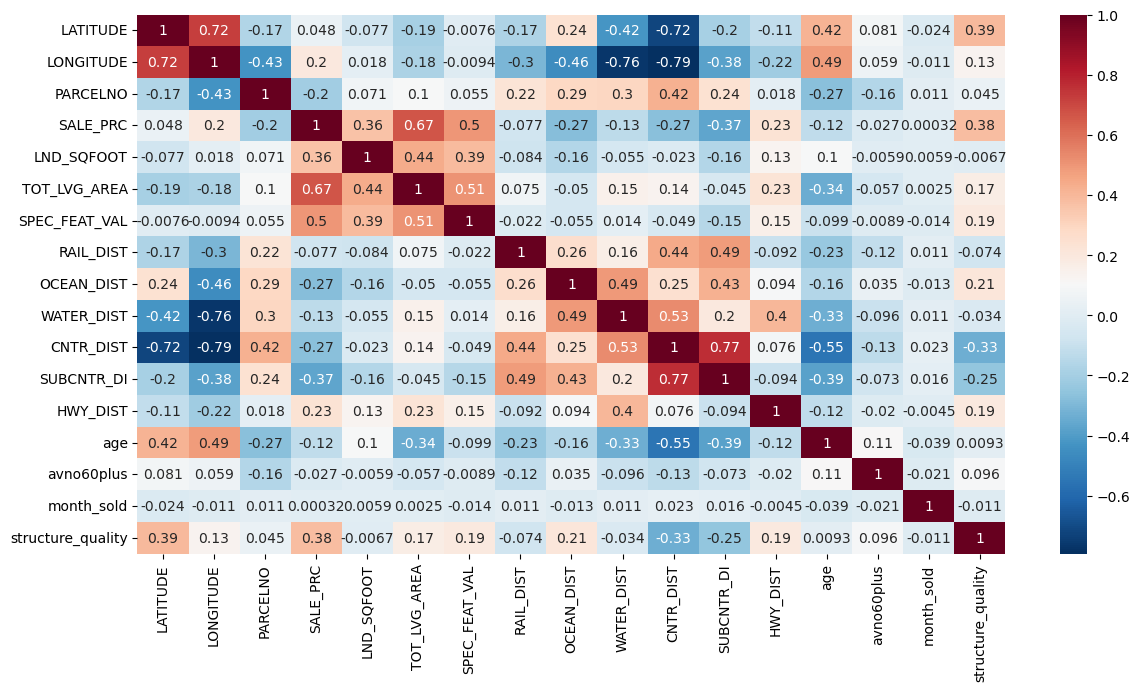

In [18]:
plt.figure(figsize=(14,7))
sns.heatmap(DatosMiami.corr(), cmap='RdBu_r', annot=True)
plt.show()

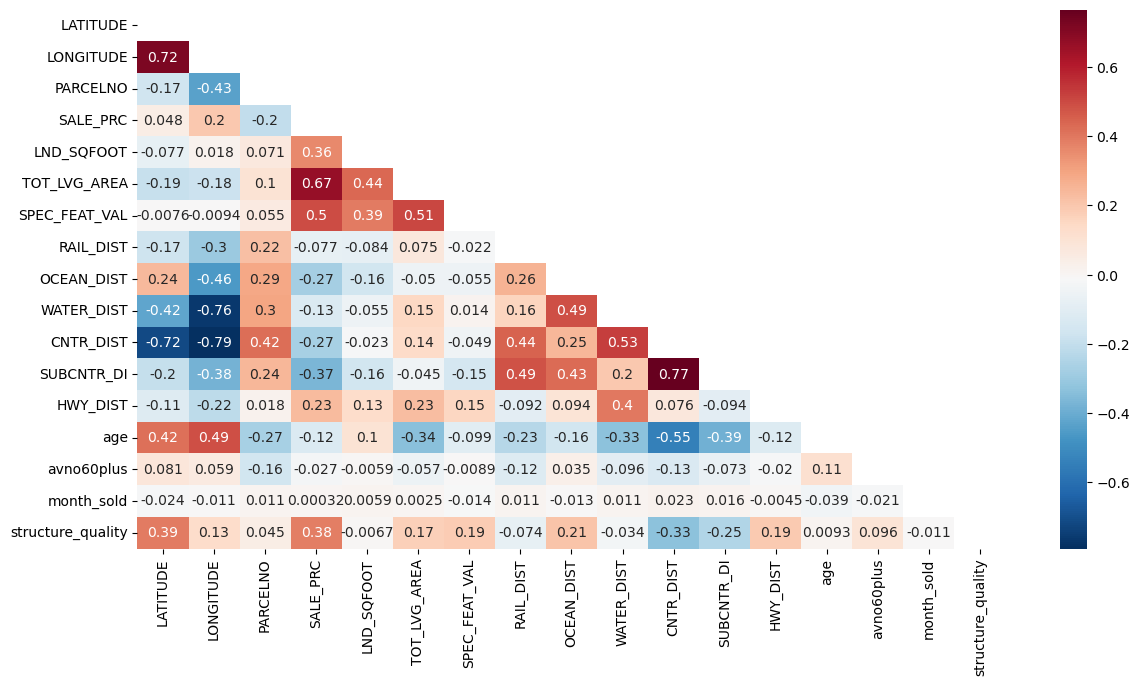

In [19]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(DatosMiami.corr())
sns.heatmap(DatosMiami.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.


### **Preparando los datos**

Preparar los datos en EDA implica limpiar y procesar los datos para poder analizarlos de manera efectiva. Esto incluye la eliminación de valores faltantes, valores atípicos, transformación de variables, normalización de datos y eliminación de variables irrelevantes o redundantes. La preparación adecuada de los datos es fundamental para obtener resultados precisos y confiables en el análisis exploratorio de datos.

**1) Eliminación de datos nulos**

La eliminación de los datos nulos es una tarea importante en el Análisis Exploratorio de Datos por varias razones:
* Mejora la calidad de los datos.
* Evita el sesgo en los análisis.
* Facilita la exploración y el análisis.
* Aumenta la eficiencia del modelo.

La presencia de valores nulos puede afectar el rendimiento del análisis y los modelos de aprendizaje automático, y por lo tanto, es necesario eliminarlos para garantizar una exploración y análisis precisos y efectivos.

La función **dropna()** de Pandas permite eliminar filas que contengan valores nulos en un DataFrame. Por defecto, esta función elimina cualquier fila que tenga al menos un valor nulo, aunque es posible especificar umbrales de valores nulos a lo largo de los ejes y eliminar solo aquellas filas que tienen valores nulos en todas sus columnas.

In [20]:
DatosMiami = DatosMiami.dropna()
DatosMiami.isnull().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

**2) Eliminación de datos atípicos**

La eliminación de datos atípicos en el Análisis Exploratorio de Datos (EDA) puede ser importante o no dependiendo del contexto. Los datos atípicos pueden tener un impacto negativo en la calidad de los análisis estadísticos y de los modelos de aprendizaje automático, ya que pueden afectar la precisión de los resultados y hacer que los modelos sean menos eficaces.

Sin embargo, no siempre es aconsejable eliminar los datos atípicos, ya que en algunos casos pueden ser válidos y significativos. Es importante analizar y comprender la naturaleza de los datos, identificar las causas de los valores atípicos y determinar si son verdaderamente atípicos o simplemente valores extremos dentro del rango de los datos. Si se determina que son irrelevantes o incorrectos, entonces se pueden eliminar de forma segura, pero solo después de una evaluación cuidadosa.

La función **clip()** se utiliza para limitar los valores de una matriz o serie de datos a un rango específico. Permite establecer un valor mínimo y máximo y recortar los valores que estén fuera de ese rango, ajustando los valores extremos a los límites establecidos.

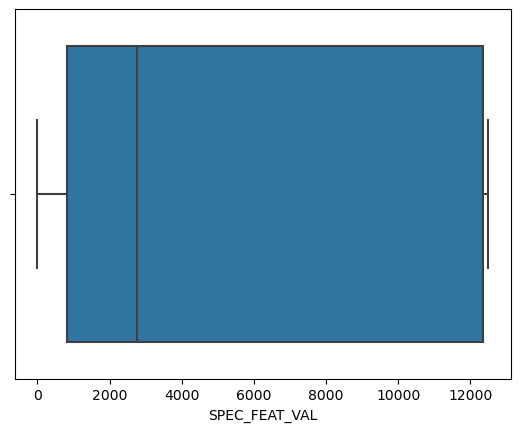

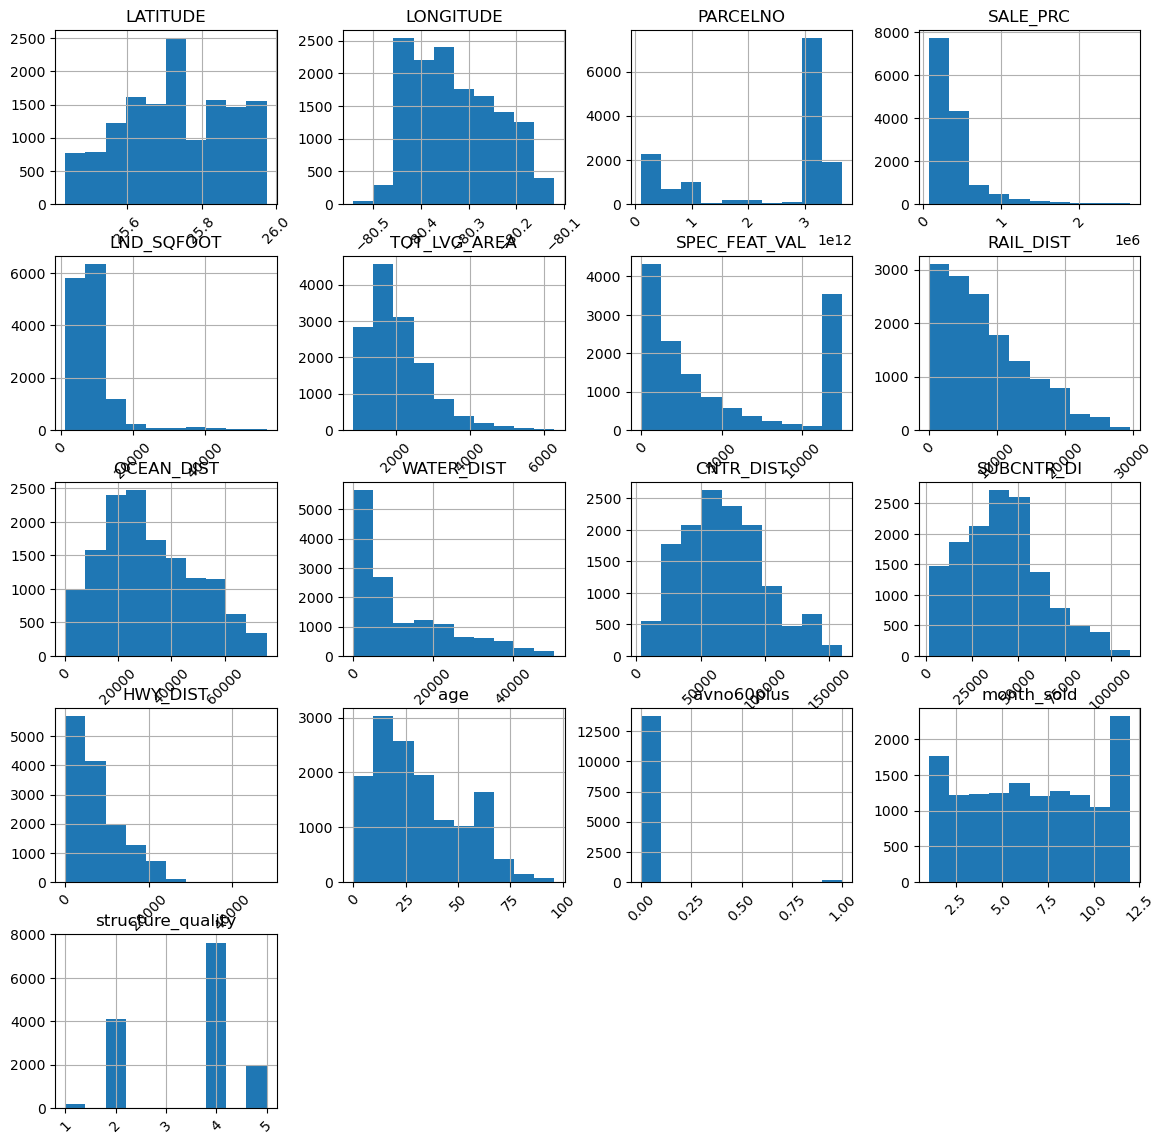

In [21]:
VariablesValoresAtipicos = ['SPEC_FEAT_VAL']

# Establecer los umbrales mínimo y máximo para cada variable
umbral_min = [0]
umbral_max = [12500]

# Aplicar la función clip a cada valor atipico
for i in range(len(VariablesValoresAtipicos)):
    DatosMiami[VariablesValoresAtipicos[i]] = DatosMiami[VariablesValoresAtipicos[i]].clip(lower=umbral_min[i], upper=umbral_max[i])

for col in VariablesValoresAtipicos:
  sns.boxplot(x=col, data=DatosMiami)
  plt.show()

DatosMiami.hist(figsize=(14,14), xrot=45)
plt.show()

Después de quitar valores atípicos,las gráficas de **Landsize** y **BuildingArea** aún parecen estar sesgadas, sin embargo el eliminar más datos puede reducir significativamente el tamaño de la muestra y, por lo tanto, la representatividad de los datos restantes. Es posible que algunos datos estén lejos del rango donde la mayoría de los datos están concentrados debido a la naturaleza de los datos o a la presencia de factores que afectan la distribución de los datos. Sin embargo, esto no necesariamente los hace valores atípicos, por lo que se vuelve sumamente importante consultar con el proveedor de los datos para evitar la pérdida de algunos datos o la corrección de los mismos.

Además, puede darse el caso donde los valores atípicos pueden ser indicativos de patrones y tendencias interesantes en los datos, por lo que eliminarlos puede perder información valiosa y potencialmente sesgar los resultados del análisis

Aqui empíeza ACP

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

In [ ]:
Estándarización de los datos

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
Estandarizar1 = StandardScaler() # Se instancia el objeto StandardScaler o MinMaxScaler
MEstandarizada1 = Estandarizar1.fit_transform(DatosMiami) # Se calculan la media y
#desviación para cada variable, y se escalan los datos
pd.DataFrame(MEstandarizada1, columns=DatosMiami.columns)
#Los valores más grandes son los que pesarían más, por eso es necesario estandarizar los datos.

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,1.153532,1.871328,-1.446087,0.126285,0.124240,-0.374974,-1.004831,-0.895569,-1.073043,-0.973193,-0.802161,-0.152197,1.356321,1.717578,-0.123109,0.407151,0.442866
1,1.155620,1.945244,-1.446087,-0.160597,0.124240,-0.421685,-1.004831,-0.645771,-1.195979,-0.974014,-0.780616,-0.170324,1.713909,1.528474,-0.123109,0.710053,0.442866
2,1.155690,1.947800,-1.446087,1.261204,0.124240,0.267920,1.550861,-0.637063,-1.200202,-0.977425,-0.779819,-0.170856,1.726350,1.433921,-0.123109,-1.410257,0.442866
3,1.158752,1.959935,-1.446087,1.853884,0.630840,-0.000055,1.046470,-0.609205,-1.223937,-1.002323,-0.771474,-0.166592,1.778074,1.528474,-0.123109,0.710053,0.442866
4,1.159178,1.937710,-1.446087,1.119339,0.688502,-0.459791,1.550861,-0.693636,-1.185271,-0.974953,-0.777654,-0.160834,1.677394,0.535674,-0.123109,0.104250,0.442866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13927,0.386256,0.758783,-1.855477,-0.393886,-0.303282,-1.341158,0.340485,-0.729069,-0.632188,-0.729758,-1.446995,-1.307022,-1.121550,-0.693506,-0.123109,-0.804454,0.442866
13928,0.389493,0.752512,-1.855477,-0.188970,-0.184663,-0.250820,-0.484696,-0.769682,-0.619462,-0.744399,-1.440771,-1.299499,-1.151078,-0.220744,-0.123109,-0.501553,0.442866
13929,0.390973,0.799922,-1.855477,-0.354479,-0.026505,-0.967468,-0.582835,-0.680719,-0.646971,-0.701600,-1.484767,-1.294256,-1.150172,-0.693506,-0.123109,0.104250,0.442866
13930,0.392491,0.784039,-1.855477,-0.267784,-0.184663,-0.547068,-0.363659,-0.706019,-0.633631,-0.701541,-1.468874,-1.293128,-1.169550,-0.693506,-0.123109,0.407151,0.442866


In [ ]:
Matriz de Covarianza

In [23]:
pca = PCA() #Se instancia el objeto PCA #pca
pca.fit(MEstandarizada1) #Se obtiene los componentes
pca.components_

array([[-3.12812417e-01, -4.27064970e-01,  2.45001640e-01,
        -1.42680764e-01, -4.51852761e-02,  6.92062071e-02,
        -3.76949582e-02,  2.36072297e-01,  2.14669079e-01,
         3.35336243e-01,  4.45255893e-01,  3.23167928e-01,
         7.42889734e-02, -2.94244558e-01, -7.93353868e-02,
         1.41194274e-02, -1.24829281e-01],
       [-1.12499415e-01, -8.51768949e-02,  3.92003890e-02,
         4.95241010e-01,  3.53868796e-01,  5.06740047e-01,
         3.75703601e-01, -5.05061130e-02, -8.99084507e-02,
         1.06326258e-01, -1.03744971e-02, -1.85142509e-01,
         2.79825585e-01, -1.63590904e-01, -3.56356747e-02,
         2.55208903e-03,  2.17855110e-01],
       [-4.50936616e-01,  3.51637789e-02, -1.62619873e-01,
         2.40932020e-02,  1.72715149e-01,  4.86638112e-02,
        -5.07800787e-02, -5.12348631e-02, -5.86480395e-01,
        -2.05044052e-01,  1.56287572e-01, -3.40001401e-02,
        -1.91971177e-01, -2.90641167e-02, -1.04638586e-01,
         3.87533440e-02, -5.1

Paso 4: Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior

In [24]:
Varianza = pca.explained_variance_ratio_
print('Proporción de varianza:', Varianza)

Proporción de varianza: [0.25936062 0.15901145 0.10136779 0.07916189 0.0606317  0.05987303
 0.05758252 0.04681678 0.03782744 0.036872   0.03400467 0.02462101
 0.01924917 0.011164   0.01077422 0.00118774 0.00049398]


In [25]:
for i in range(0, Varianza.size):
    print('Componente', i, '->', Varianza[i]*100, '%')
    varAcumulada = sum(Varianza[0:i+1])
    print('Varianza acumulada:', varAcumulada*100, '%')
    if varAcumulada > 0.90:
        varAcumuladaACP = (varAcumulada - Varianza[i])
        numComponentesACP = i - 1
        print('Se requieren', i, 'componentes para alcanzar el 90% de relevancia')
        print('La varianza acumulada para', i, 'componentes es de:', varAcumuladaACP*100, '%')
        break

Componente 0 -> 25.9360618572274 %
Varianza acumulada: 25.9360618572274 %
Componente 1 -> 15.901144954498356 %
Varianza acumulada: 41.83720681172576 %
Componente 2 -> 10.136779267538245 %
Varianza acumulada: 51.973986079264 %
Componente 3 -> 7.916189390372026 %
Varianza acumulada: 59.890175469636034 %
Componente 4 -> 6.063169734043342 %
Varianza acumulada: 65.95334520367938 %
Componente 5 -> 5.987302804928685 %
Varianza acumulada: 71.94064800860805 %
Componente 6 -> 5.758251830264366 %
Varianza acumulada: 77.69889983887242 %
Componente 7 -> 4.681677659803174 %
Varianza acumulada: 82.38057749867559 %
Componente 8 -> 3.7827444066339586 %
Varianza acumulada: 86.16332190530956 %
Componente 9 -> 3.6872000628501143 %
Varianza acumulada: 89.85052196815967 %
Componente 10 -> 3.400466874011977 %
Varianza acumulada: 93.25098884217165 %
Se requieren 10 componentes para alcanzar el 90% de relevancia
La varianza acumulada para 10 componentes es de: 89.85052196815967 %


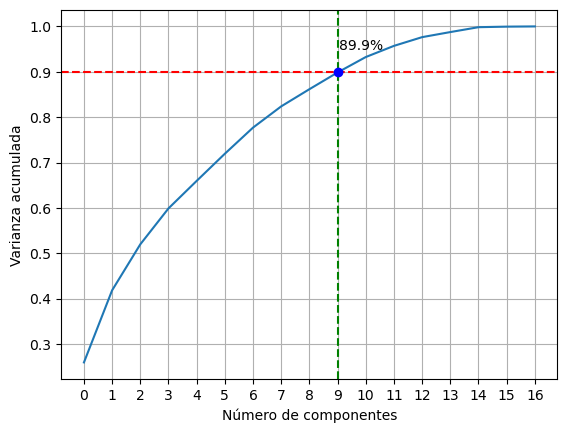

In [26]:
plt.plot(np.cumsum(Varianza))
plt.xticks(np.arange(0, Varianza.size, step=1))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
# Se resalta el número de componentes que se requieren para alcanzar el 90% de varianza acumulada
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=numComponentesACP, color='g', linestyle='--')
# Se muestra un punto en la intersección de las líneas
plt.plot(numComponentesACP, varAcumuladaACP, 'bo')
# Se muestra el valor de la varianza acumulada
plt.text(numComponentesACP+0.05, varAcumuladaACP+0.05, str(round(varAcumuladaACP*100, 1))+'%')
plt.grid()
plt.show()

Se examina la proporción de relevancia

In [27]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=DatosMiami.columns)
CargasComponentes.head(numComponentesACP+1) # Se muestran los primeros 7 componentes

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,0.312812,0.427065,0.245002,0.142681,0.045185,0.069206,0.037695,0.236072,0.214669,0.335336,0.445256,0.323168,0.074289,0.294245,0.079335,0.014119,0.124829
1,0.112499,0.085177,0.039200,0.495241,0.353869,0.506740,0.375704,0.050506,0.089908,0.106326,0.010374,0.185143,0.279826,0.163591,0.035636,0.002552,0.217855
2,0.450937,0.035164,0.162620,0.024093,0.172715,0.048664,0.050780,0.051235,0.586480,0.205044,0.156288,0.034000,0.191971,0.029064,0.104639,0.038753,0.518902
3,0.241687,0.219412,0.159627,0.125670,0.104544,0.184831,0.200121,0.467484,0.053071,0.394108,0.071481,0.362739,0.455121,0.120419,0.169095,0.027403,0.051811
4,0.050803,0.067910,0.379165,0.265010,0.497310,0.080127,0.279528,0.103135,0.115899,0.054576,0.006575,0.059544,0.076845,0.422580,0.032462,0.433595,0.206794
5,0.073856,0.036262,0.301090,0.071334,0.035517,0.090357,0.033100,0.086826,0.029167,0.085410,0.080642,0.158441,0.078055,0.089097,0.744690,0.520641,0.003742
6,0.001734,0.059854,0.046422,0.116387,0.279625,0.005071,0.153882,0.050256,0.102895,0.014834,0.038835,0.055578,0.094447,0.150980,0.538011,0.731038,0.072805
7,0.137353,0.100482,0.563562,0.044115,0.213501,0.008580,0.000933,0.332728,0.166481,0.116578,0.032326,0.263349,0.418715,0.317285,0.181440,0.044651,0.269285
8,0.065897,0.015039,0.250203,0.107578,0.318857,0.082270,0.726405,0.379566,0.119319,0.035875,0.024616,0.139297,0.079524,0.191857,0.128243,0.016706,0.213758
9,0.241409,0.204136,0.092982,0.058194,0.284765,0.132534,0.324260,0.543430,0.079553,0.194975,0.097579,0.387782,0.239452,0.335881,0.004428,0.033893,0.115497


In [28]:
# Se obtienen los componentes principales (cargas mayores a 0.5)
componentesPrincipales = []
for i in range(0, CargasComponentes.shape[0]): #Recorre las columnas
    for j in range(0, CargasComponentes.shape[1]-numComponentesACP+1): # Recorre los componentes (filas)
        if CargasComponentes.iloc[j, i] >= 0.5:
            print(CargasComponentes.columns[i], ':', CargasComponentes.iloc[j, i])
            componentesPrincipales = np.append(componentesPrincipales, CargasComponentes.columns[i])

PARCELNO : 0.5635618476850536
TOT_LVG_AREA : 0.5067400468133164
SPEC_FEAT_VAL : 0.7264049237320346
OCEAN_DIST : 0.5864803950537913
avno60plus : 0.7446897757189886
avno60plus : 0.5380109399945758
month_sold : 0.5206406710845961
month_sold : 0.7310376834139679
structure_quality : 0.5189015435935697


In [40]:
#Solo incluimos los componentes principales:
DatosMiamiACP = DatosMiami.loc[:, componentesPrincipales]
DatosMiamiACP

,PARCELNO,TOT_LVG_AREA,SPEC_FEAT_VAL,OCEAN_DIST,avno60plus,avno60plus,month_sold,month_sold,structure_quality
0,622280070620,1753,0,12811.4,0,0,8,8,4
1,622280100460,1715,0,10648.4,0,0,9,9,4
2,622280100470,2276,12500,10574.1,0,0,2,2,4
3,622280100530,2058,10033,10156.5,0,0,9,9,4
4,622280100200,1684,12500,10836.8,0,0,7,7,4
...,...,...,...,...,...,...,...,...,...
13927,131320040990,967,6580,20568.0,0,0,4,4,4
13928,131320040910,1854,2544,20791.9,0,0,5,5,4
13929,131320040420,1271,2064,20307.9,0,0,7,7,4
13930,131320040330,1613,3136,20542.6,0,0,8,8,4


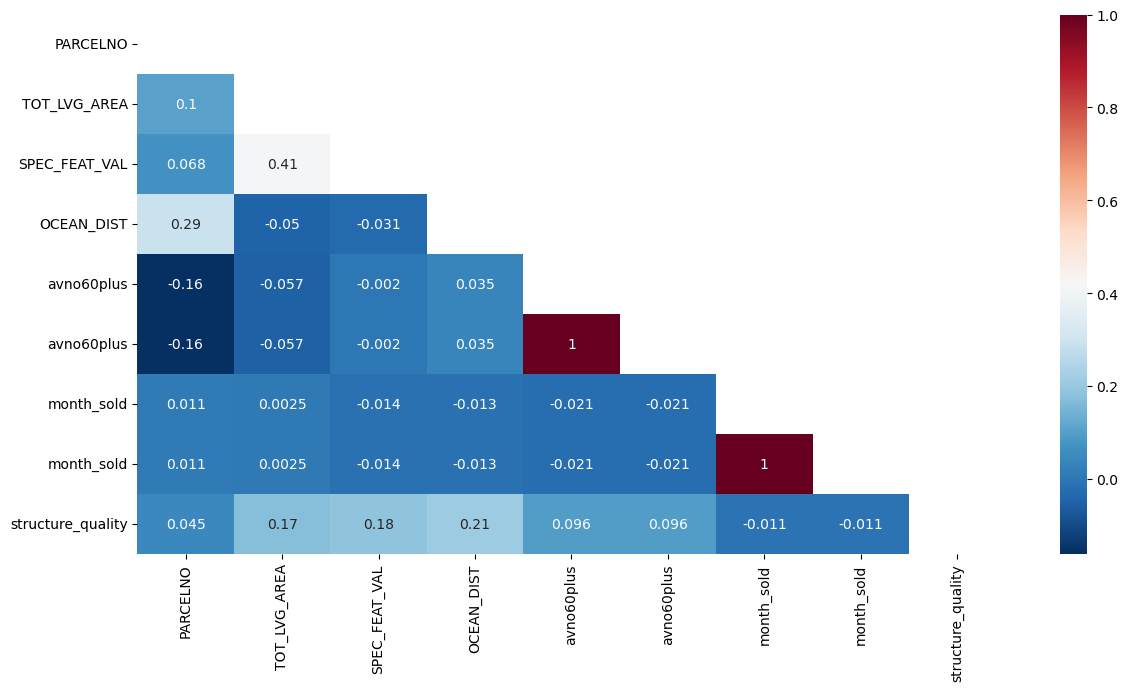

In [41]:
CorrMiamiACP = DatosMiamiACP.corr(method='pearson')
plt.figure(figsize=(14,7))
MatrizInfACP = np.triu(CorrMiamiACP)
sns.heatmap(CorrMiamiACP, cmap='RdBu_r', annot=True, mask=MatrizInfACP)
plt.show()

In [ ]:
Análisis correlacional de datos (ACD)